# Binary Classification
In this example, we will build a simple neural network model to classify fake samples into two categories.



## Load Raw Data
[scikit-learn](https://scikit-learn.org/stable/index.html) is a handy machine learning library for Python. We can creat an artificial dataset for the binary classification task using its [datasets](https://scikit-learn.org/stable/api/sklearn.datasets.html) module.

In [1]:
from sklearn.datasets import make_moons
import numpy as np
X, y = make_moons(n_samples=1024, noise=0.2, random_state=3321)
print(X.shape, y.shape)
print(X[:10])
print(y[:10])

(1024, 2) (1024,)
[[-0.86691851 -0.32027284]
 [ 1.70922817 -0.66094909]
 [ 0.95477398  0.28453102]
 [ 0.14465106  0.33336045]
 [ 0.58070122  0.65058253]
 [ 1.33531488 -0.2647643 ]
 [ 1.46344736 -0.55310411]
 [-1.20787839  0.52778545]
 [ 0.47737585 -0.2020379 ]
 [ 1.45674566 -0.27188258]]
[0 1 0 1 0 1 1 0 1 1]


### Visualize the Data Feature-Wise


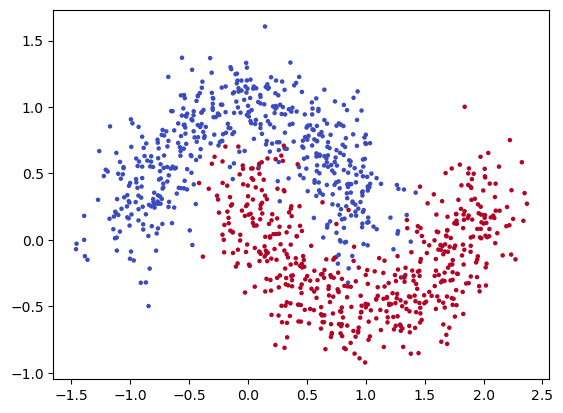

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=5*np.ones(y.size), c=y, cmap='coolwarm')


### Regulate the Data
1. Rescale features matrix.
2. Reshape label vector.

(1024, 2) (1024, 1)


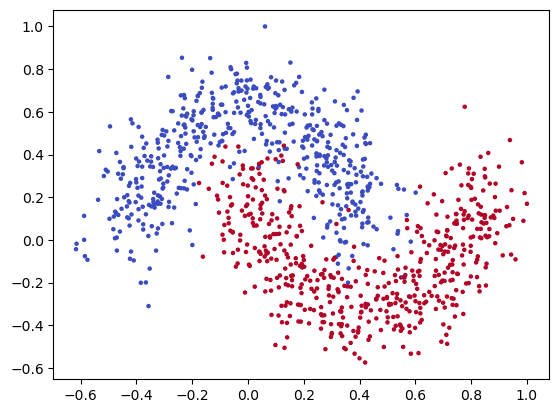

In [3]:
# Rescale by max
X_train = X / X.max(axis=0)

# Reshape labels
y_train = y.reshape(-1, 1)
print(X_train.shape, y_train.shape)  # for debug

# Visualize
plt.scatter(X_train[:, 0], X_train[:, 1], s=5*np.ones(y_train.size), c=y_train, cmap='coolwarm')

## Linear Model
 
$\hat{\mathbf{y}} = \mathbf{X} \cdot \mathbf{w}^T + \mathbf{b}$

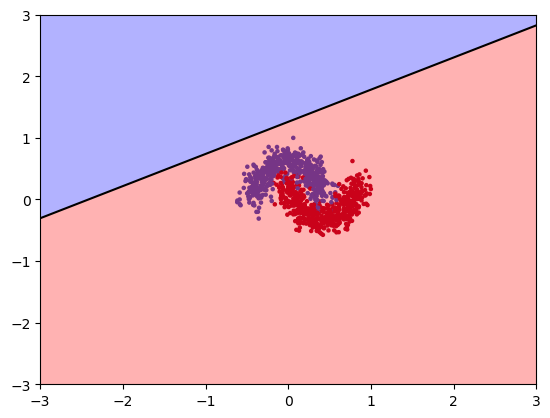

In [4]:
# Define model function
def linear(in_features, weight, bias):
    preds = in_features @ weight.T + bias
    return preds

# Sanity check
w_dummy = np.array([[1.2, -2.3]]) 
b_dummy = 3.4
y_pred_dummy = linear(X_train, w_dummy, b_dummy)


# Decision boundary
db_x = np.linspace(-3., 3.)
db_y = (0.5 - b_dummy - w_dummy[0, 0] * db_x) / w_dummy[0, 1]
plt.scatter(X_train[:, 0], X_train[:, 1], s=5*np.ones(y_train.size), c=y_train, cmap='coolwarm')
plt.plot(db_x, db_y, 'k')
# Create a meshgrid of points over the feature space
xx, yy = np.meshgrid(np.linspace(-3., 3., 300),
                     np.linspace(-3., 3., 300))
zz = w_dummy[0, 0] * xx + w_dummy[0, 1] * yy + b_dummy - 0.5
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.3)



## Mean Squared Error (MSE) Loss Function
Evaluate model performance with MSE loss: $\mathcal{L}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{M} \sum_{i=1}^{M} \frac{1}{2} ({}^{(i)}\hat{y} - {}^{(i)}y)^2 = \frac{1}{2} \overline{(\hat{\mathbf{y}} - \mathbf{y})^2}$

In [5]:
def mse_loss(preds, labels):
    error = 0.5 * (preds - labels) ** 2
    return np.mean(error)

# Sanity check
loss = mse_loss(preds=linear(X_train, w_dummy, b_dummy), labels=y_train)
print(f"mse loss: {loss}")

mse loss: 4.202149428445785


## Gradient Descent Optimization

initial parameters: w = [[-0.00012217 -0.00016051]], b = -3.4764541373376834e-05
loss @ 1 iteration: 0.25003635329052043
loss @ 2 iteration: 0.2355680784743096
loss @ 3 iteration: 0.22250830580628667
loss @ 4 iteration: 0.21071170886768473
loss @ 5 iteration: 0.20004810201969264
loss @ 6 iteration: 0.19040086044102394
loss @ 7 iteration: 0.1816655050805084
loss @ 8 iteration: 0.17374843531027212
loss @ 9 iteration: 0.16656579386199083
loss @ 10 iteration: 0.16004245023804914
loss @ 11 iteration: 0.15411109023079653
loss @ 12 iteration: 0.1487114004739909
loss @ 13 iteration: 0.143789338106674
loss @ 14 iteration: 0.13929647666518885
loss @ 15 iteration: 0.13518942024642977
loss @ 16 iteration: 0.1314292788159934
loss @ 17 iteration: 0.12798119827877363
loss @ 18 iteration: 0.12481393959577328
loss @ 19 iteration: 0.12189950182758767
loss @ 20 iteration: 0.11921278451941576
loss @ 21 iteration: 0.11673128532106967
loss @ 22 iteration: 0.11443482916411032
loss @ 23 iteration: 0.112305325

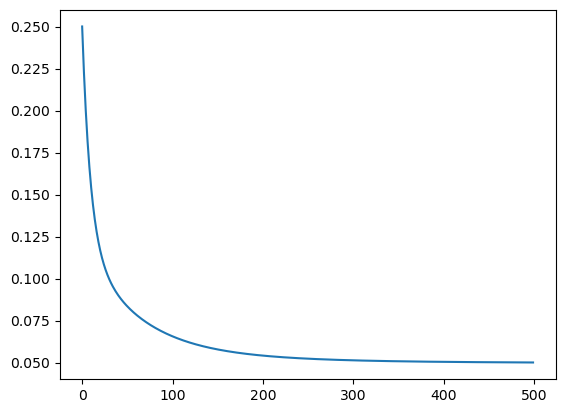

In [6]:
# Define gradient computation function
def grad(in_features, preds, labels):
    dw = 1 / labels.shape[0] * ((preds - labels).T @ in_features)  # dL/dw
    db = np.mean(preds - labels)  # dL/db 
    return dw, db

# Init parameters
w = np.random.normal(0, 1e-4, (1, 2)) 
b = np.random.normal(0, 1e-4)
print(f"initial parameters: w = {w}, b = {b}")
# Gradient descent optimization
num_iters = 500
learning_rate = 0.05
losses = []
for i in range(num_iters):
    y_pred = linear(X_train, w, b)
    dw, db = grad(X_train, y_pred, y_train)
    loss = mse_loss(y_pred, y_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    losses.append(loss)
print(f"final parameters: w = {w}, b = {b}")

# Observe the loss change
plt.plot(losses)

### Visualize Decision Boundary


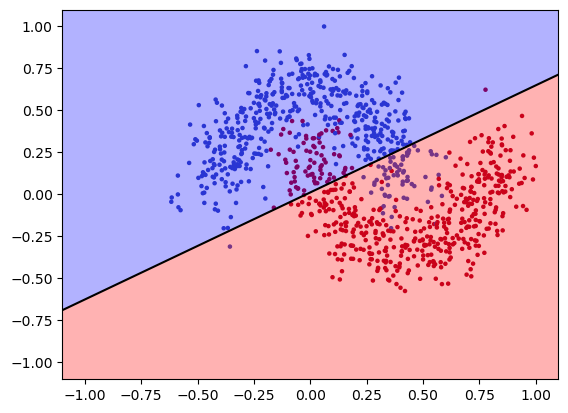

In [7]:
# Credit to ChatGPT
# Create a meshgrid of points over the feature space
xx, yy = np.meshgrid(np.linspace(-1.1, 1.1, 200),
                     np.linspace(-1.1, 1.1, 200))
zz = w[0, 0] * xx + w[0, 1] * yy + b - 0.5


bound_x = np.linspace(-1.1, 1.1)
bound_y = (0.5 - b - w[0, 0] * bound_x) / w[0, 1]
plt.scatter(X_train[:, 0], X_train[:, 1], s=5*np.ones(y_train.size), c=y_train, cmap='coolwarm')
plt.plot(bound_x, bound_y, 'k')
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.3)



## Upgrade Model and Assessment
### Linear Model Activated by Sigmoid Function
$\hat{\mathbf{y}} = \sigma(\mathbf{z}) = \sigma(\mathbf{X} \cdot \mathbf{w}^T + \mathbf{b})$, where $\sigma (\mathbf{z}) = 1 / (1 + e^{-\mathbf{z}})$

In [8]:
# Define ReLU function
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

# Redefine forward pass. Intermediate result, Z, needs to be tracked 
def forward(in_features, weight, bias):
    Z = linear(in_features, weight, bias)
    preds = sigmoid(Z)
    return preds


### Binary Cross-Entropy Loss
$\mathcal{L}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{M} \sum_{i=1}^{M} -{}^{(i)}y \ln {}^{(i)}\hat{y} - (1 - {}^{(i)}y) \ln (1 - {}^{(i)}\hat{y}) = \overline{-\mathbf{y} \ln \hat{\mathbf{y}} - (1 - \mathbf{y}) \ln (1 - \hat{\mathbf{y}})}$

#### Gradient computation
BCE loss is able to simplify loss gradient computation.
- MSE loss gradient:

    $\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \frac{1}{M} [(\hat{\mathbf{y}} - \mathbf{y}) * \hat{\mathbf{y}} * (1 - \hat{\mathbf{y}})]^T \cdot \mathbf{X}$

    $\frac{\partial \mathcal{L}}{\partial b} = \overline{(\hat{\mathbf{y}} - \mathbf{y}) * \hat{\mathbf{y}} * (1 - \hat{\mathbf{y}})}$

- BCE loss gradient: 

    $\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \frac{1}{M} (\hat{\mathbf{y}} - \mathbf{y})^T \cdot \mathbf{X}$

    $\frac{\partial \mathcal{L}}{\partial b} = \overline{(\hat{\mathbf{y}} - \mathbf{y})}$


initial parameters: w = [[-7.10472725e-05 -1.10436872e-04]], b = 8.866825866986537e-05
loss @ 1 iteration: 0.12499863336005476
loss @ 2 iteration: 0.11946664673675995
loss @ 3 iteration: 0.1143684711076056
loss @ 4 iteration: 0.10967847699589864
loss @ 5 iteration: 0.10536976069460582
loss @ 6 iteration: 0.10141500398666223
loss @ 7 iteration: 0.09778715935812138
loss @ 8 iteration: 0.0944599713143835
loss @ 9 iteration: 0.09140835064667407
loss @ 10 iteration: 0.08860862288019504
loss @ 11 iteration: 0.08603867378746309
loss @ 12 iteration: 0.08367801417690333
loss @ 13 iteration: 0.0815077839700598
loss @ 14 iteration: 0.07951071262456873
loss @ 15 iteration: 0.07767104981348076
loss @ 16 iteration: 0.07597447729354173
loss @ 17 iteration: 0.07440801027449634
loss @ 18 iteration: 0.07295989440928716
loss @ 19 iteration: 0.07161950275974982
loss @ 20 iteration: 0.07037723571388801
loss @ 21 iteration: 0.06922442578238475
loss @ 22 iteration: 0.06815324842387063
loss @ 23 iteration: 0.

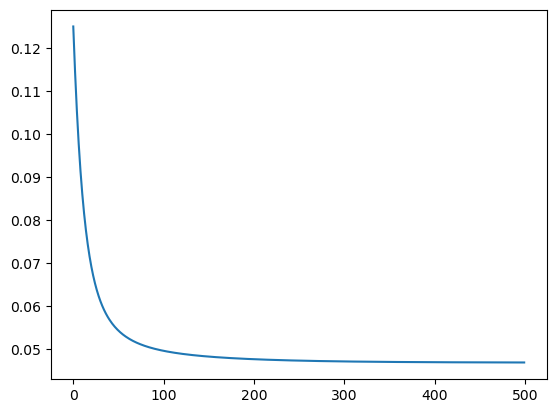

In [11]:
def bce_loss(preds, labels):
    error = -labels * np.log(preds) - (1 - labels) * np.log(1 - preds)
    return np.mean(error)

# Optimization iterations
w = np.random.normal(0, 1e-4, (1, 2)) 
b = np.random.normal(0, 1e-4)
print(f"initial parameters: w = {w}, b = {b}")
num_iters = 500
learning_rate = 0.9
losses = []
for i in range(num_iters):
    pred_train = forward(X_train, w, b)
    dw, db = grad(X_train, pred_train, y_train)
    loss = mse_loss(pred_train, y_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    # print(f"w = {w}, b = {b}")
    losses.append(loss)
print(f"final parameters: w = {w}, b = {b}")

# Observe loss values
plt.plot(losses)

### Visualize Sigmoid Function Activated Model Decision

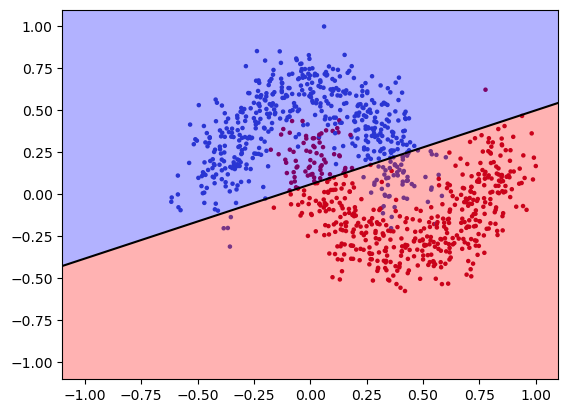

In [12]:
# Credit to ChatGPT
# Create a meshgrid of points over the feature space
xx, yy = np.meshgrid(np.linspace(-1.1, 1.1, 200),
                     np.linspace(-1.1, 1.1, 200))
zz = sigmoid(w[0, 0] * xx + w[0, 1] * yy + b) - 0.5


db_x = np.linspace(-1.1, 1.1)
db_y = (-b - w[0, 0] * db_x) / w[0, 1]
plt.scatter(X_train[:, 0], X_train[:, 1], s=5*np.ones(y_train.size), c=y_train, cmap='coolwarm')
plt.plot(db_x, db_y, 'k')
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.3)




## 